In [1]:
using MLJ
using Queryverse
using DataFrames
using Gadfly
using XLSX
using Dates
using Statistics
using StatsBase
using StatsPlots

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1260
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1260


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"

"https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"

In [3]:
@time download(url, "online_retail_II.xlsx")

  9.421370 seconds (1.40 M allocations: 63.575 MiB, 0.33% gc time)


"online_retail_II.xlsx"

In [4]:
ENV["COLUMNS"] = 1000

1000

In [5]:
@time df_2009 = DataFrame(XLSX.readtable("online_retail_II.xlsx", "Year 2009-2010")...);

302.148667 seconds (1.76 G allocations: 62.340 GiB, 10.59% gc time)


In [6]:
@time df_2010 = DataFrame(XLSX.readtable("online_retail_II.xlsx", "Year 2010-2011")...);

323.028329 seconds (1.81 G allocations: 63.975 GiB, 9.50% gc time)


In [7]:
main_df = vcat(df_2009, df_2010)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
,Any,Any,Any,Any,Any,Any,Any,Any
1,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01T07:45:00,6.95,13085,United Kingdom
2,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01T07:45:00,6.75,13085,United Kingdom
3,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01T07:45:00,6.75,13085,United Kingdom
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01T07:45:00,2.1,13085,United Kingdom
5,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01T07:45:00,1.25,13085,United Kingdom
6,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01T07:45:00,1.65,13085,United Kingdom
7,489434,21871,SAVE THE PLANET MUG,24,2009-12-01T07:45:00,1.25,13085,United Kingdom
8,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01T07:45:00,5.95,13085,United Kingdom
9,489435,22350,CAT BOWL,12,2009-12-01T07:46:00,2.55,13085,United Kingdom


In [8]:
schema(main_df)

┌─────────────┬─────────┬────────────────────────────────────┐
│ _.names     │ _.types │ _.scitypes                         │
├─────────────┼─────────┼────────────────────────────────────┤
│ Invoice     │ Any     │ Union{Count, Textual}              │
│ StockCode   │ Any     │ Union{Count, Textual}              │
│ Description │ Any     │ Union{Missing, Count, Textual}     │
│ Quantity    │ Any     │ Count                              │
│ InvoiceDate │ Any     │ ScientificTypes.ScientificDateTime │
│ Price       │ Any     │ Union{Continuous, Count}           │
│ Customer ID │ Any     │ Union{Missing, Count}              │
│ Country     │ Any     │ Textual                            │
└─────────────┴─────────┴────────────────────────────────────┘
_.nrows = 1067371


In [9]:
describe(main_df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Int64,DataType
1,Invoice,,,,,53628,0,Any
2,StockCode,,,,,5305,0,Any
3,Description,,,,,5698,4382,Any
4,Quantity,9.9389,-80995,3.0,80995,1057,0,Any
5,InvoiceDate,,2009-12-01T07:45:00,,2011-12-09T12:50:00,47635,0,Any
6,Price,4.64939,-53594.4,2.1,38970.0,2807,0,Any
7,Customer ID,15324.6,12346,15255.0,18287,5942,243007,Any
8,Country,,Australia,,West Indies,43,0,Any


In [10]:
myparse(x::AbstractString) = parse(Int, x)
myparse(x::Int) = x
myparse(x::Missing) = missing

strparse(x::AbstractString) = string(x)
strparse(x::Int) = string(x)
strparse(x::Missing) = missing

strparse (generic function with 3 methods)

In [11]:
function make_types(df)
    df[!, :Invoice]                = string.(df[!, :Invoice])
    df[!, :StockCode]              = string.(df[!, :StockCode])
    df[!, :Description]            = strparse.(df[!, :Description])
    df[!, :Quantity]               = Int.(df[!, :Quantity])
    df[!, :InvoiceDate]            = DateTime.(df[!, :InvoiceDate])
    df[!, :Price]                  = Float32.(df[!, :Price])
    df[!, Symbol("Customer ID")]   = myparse.(df[!, Symbol("Customer ID")])
    df[!, :Country]                = string.(df[!, :Country])
    
    return df
end

make_types (generic function with 1 method)

In [12]:
@time final_df = make_types(main_df)

  4.073331 seconds (18.84 M allocations: 681.776 MiB, 8.64% gc time)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
,String,String,String⍰,Int64,DateTime,Float32,Int64⍰,String
1,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01T07:45:00,6.95,13085,United Kingdom
2,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01T07:45:00,6.75,13085,United Kingdom
3,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01T07:45:00,6.75,13085,United Kingdom
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01T07:45:00,2.1,13085,United Kingdom
5,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01T07:45:00,1.25,13085,United Kingdom
6,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01T07:45:00,1.65,13085,United Kingdom
7,489434,21871,SAVE THE PLANET MUG,24,2009-12-01T07:45:00,1.25,13085,United Kingdom
8,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01T07:45:00,5.95,13085,United Kingdom
9,489435,22350,CAT BOWL,12,2009-12-01T07:46:00,2.55,13085,United Kingdom


In [13]:
schema(final_df)

┌─────────────┬────────────────────────┬────────────────────────────────────┐
│ _.names     │ _.types                │ _.scitypes                         │
├─────────────┼────────────────────────┼────────────────────────────────────┤
│ Invoice     │ String                 │ Textual                            │
│ StockCode   │ String                 │ Textual                            │
│ Description │ Union{Missing, String} │ Union{Missing, Textual}            │
│ Quantity    │ Int64                  │ Count                              │
│ InvoiceDate │ DateTime               │ ScientificTypes.ScientificDateTime │
│ Price       │ Float32                │ Continuous                         │
│ Customer ID │ Union{Missing, Int64}  │ Union{Missing, Count}              │
│ Country     │ String                 │ Textual                            │
└─────────────┴────────────────────────┴────────────────────────────────────┘
_.nrows = 1067371


In [14]:
describe(final_df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Any,Any,Union…,Any,Union…,Union…,Type
1,Invoice,,489434,,C581569,53628,,String
2,StockCode,,10002,,m,5305,,String
3,Description,,DOORMAT UNION JACK GUNS AND ROSES,,wrongly sold sets,5698,4382,"Union{Missing, String}"
4,Quantity,9.9389,-80995,3.0,80995,,,Int64
5,InvoiceDate,,2009-12-01T07:45:00,,2011-12-09T12:50:00,47635,,DateTime
6,Price,4.64939,-53594.4,2.1,38970.0,,,Float32
7,Customer ID,15324.6,12346,15255.0,18287,,243007,"Union{Missing, Int64}"
8,Country,,Australia,,West Indies,43,,String


# Data Preprocessing

In [15]:
rename!(final_df, Dict(Symbol("Customer ID") => :CustomerID))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
,String,String,String⍰,Int64,DateTime,Float32,Int64⍰,String
1,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01T07:45:00,6.95,13085,United Kingdom
2,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01T07:45:00,6.75,13085,United Kingdom
3,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01T07:45:00,6.75,13085,United Kingdom
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01T07:45:00,2.1,13085,United Kingdom
5,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01T07:45:00,1.25,13085,United Kingdom
6,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01T07:45:00,1.65,13085,United Kingdom
7,489434,21871,SAVE THE PLANET MUG,24,2009-12-01T07:45:00,1.25,13085,United Kingdom
8,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01T07:45:00,5.95,13085,United Kingdom
9,489435,22350,CAT BOWL,12,2009-12-01T07:46:00,2.55,13085,United Kingdom


In [16]:
master_df = final_df |> dropmissing

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
,String,String,String,Int64,DateTime,Float32,Int64,String
1,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01T07:45:00,6.95,13085,United Kingdom
2,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01T07:45:00,6.75,13085,United Kingdom
3,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01T07:45:00,6.75,13085,United Kingdom
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01T07:45:00,2.1,13085,United Kingdom
5,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01T07:45:00,1.25,13085,United Kingdom
6,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01T07:45:00,1.65,13085,United Kingdom
7,489434,21871,SAVE THE PLANET MUG,24,2009-12-01T07:45:00,1.25,13085,United Kingdom
8,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01T07:45:00,5.95,13085,United Kingdom
9,489435,22350,CAT BOWL,12,2009-12-01T07:46:00,2.55,13085,United Kingdom


In [17]:
schema(master_df)

┌─────────────┬──────────┬────────────────────────────────────┐
│ _.names     │ _.types  │ _.scitypes                         │
├─────────────┼──────────┼────────────────────────────────────┤
│ Invoice     │ String   │ Textual                            │
│ StockCode   │ String   │ Textual                            │
│ Description │ String   │ Textual                            │
│ Quantity    │ Int64    │ Count                              │
│ InvoiceDate │ DateTime │ ScientificTypes.ScientificDateTime │
│ Price       │ Float32  │ Continuous                         │
│ CustomerID  │ Int64    │ Count                              │
│ Country     │ String   │ Textual                            │
└─────────────┴──────────┴────────────────────────────────────┘
_.nrows = 824364


In [18]:
master_df = master_df |>
    @mutate(TotalAmount = _.Price * _.Quantity) |>
    DataFrame

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount
,String,String,String,Int64,DateTime,Float32,Int64,String,Float32
1,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01T07:45:00,6.95,13085,United Kingdom,83.4
2,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01T07:45:00,6.75,13085,United Kingdom,81.0
3,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01T07:45:00,6.75,13085,United Kingdom,81.0
4,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01T07:45:00,2.1,13085,United Kingdom,100.8
5,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01T07:45:00,1.25,13085,United Kingdom,30.0
6,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01T07:45:00,1.65,13085,United Kingdom,39.6
7,489434,21871,SAVE THE PLANET MUG,24,2009-12-01T07:45:00,1.25,13085,United Kingdom,30.0
8,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01T07:45:00,5.95,13085,United Kingdom,59.5
9,489435,22350,CAT BOWL,12,2009-12-01T07:46:00,2.55,13085,United Kingdom,30.6


# RFM Model

In [19]:
# Monetary
rfm_monetary = master_df |> 
    @groupby(_.CustomerID) |>
    @map({CustomerID = key(_), Amount = sum(_.TotalAmount)}) |>
    @orderby(_.CustomerID) |>
    DataFrame

,CustomerID,Amount
,Int64,Float32
1,12346,-64.6797
2,12347,5633.32
3,12348,2019.4
4,12349,4404.54
5,12350,334.4
6,12351,300.93
7,12352,1889.21
8,12353,406.76
9,12354,1079.4


In [20]:
# Frequency
rfm_frquency = master_df |>
    @groupby(_.CustomerID) |>
    @map({CustomerID = key(_), Frequency = length(_.Invoice)}) |>
    @orderby(_.CustomerID) |>
    DataFrame

,CustomerID,Frequency
,Int64,Int64
1,12346,48
2,12347,253
3,12348,51
4,12349,180
5,12350,17
6,12351,21
7,12352,113
8,12353,24
9,12354,58


In [21]:
# Recency
max_date = maximum(master_df[!, :InvoiceDate])

2011-12-09T12:50:00

In [22]:
rfm_recency = master_df |>
    @mutate(TimeDifference = Dates.days(max_date - _.InvoiceDate)) |>
    @groupby(_.CustomerID) |>
    @map({CustomerID = key(_), Recency = minimum(_.TimeDifference)}) |>
    @orderby(_.CustomerID) |>
    DataFrame

,CustomerID,Recency
,Any,Any
1,12346,325
2,12347,1
3,12348,74
4,12349,18
5,12350,309
6,12351,374
7,12352,35
8,12353,203
9,12354,231


In [23]:
rfm_data = join(rfm_recency, rfm_frquency, rfm_monetary,
                on = :CustomerID, kind = :inner) 

,CustomerID,Recency,Frequency,Amount
,Any,Any,Int64,Float32
1,12346,325,48,-64.6797
2,12347,1,253,5633.32
3,12348,74,51,2019.4
4,12349,18,180,4404.54
5,12350,309,17,334.4
6,12351,374,21,300.93
7,12352,35,113,1889.21
8,12353,203,24,406.76
9,12354,231,58,1079.4


In [24]:
rfm_data

,CustomerID,Recency,Frequency,Amount
,Any,Any,Int64,Float32
1,12346,325,48,-64.6797
2,12347,1,253,5633.32
3,12348,74,51,2019.4
4,12349,18,180,4404.54
5,12350,309,17,334.4
6,12351,374,21,300.93
7,12352,35,113,1889.21
8,12353,203,24,406.76
9,12354,231,58,1079.4


In [25]:
rfm_data[!, :CustomerID] = Int.(rfm_data[!, :CustomerID]);
rfm_data[!, :Recency] = Int.(rfm_data[!, :Recency]);

In [26]:
rfm_data

,CustomerID,Recency,Frequency,Amount
,Int64,Int64,Int64,Float32
1,12346,325,48,-64.6797
2,12347,1,253,5633.32
3,12348,74,51,2019.4
4,12349,18,180,4404.54
5,12350,309,17,334.4
6,12351,374,21,300.93
7,12352,35,113,1889.21
8,12353,203,24,406.76
9,12354,231,58,1079.4


In [27]:
schema(rfm_data)

┌────────────┬─────────┬────────────┐
│ _.names    │ _.types │ _.scitypes │
├────────────┼─────────┼────────────┤
│ CustomerID │ Int64   │ Count      │
│ Recency    │ Int64   │ Count      │
│ Frequency  │ Int64   │ Count      │
│ Amount     │ Float32 │ Continuous │
└────────────┴─────────┴────────────┘
_.nrows = 5942


In [28]:
rfm_data |> describe

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Abstract…,Real,Float64,Real,Nothing,Nothing,DataType
1,CustomerID,15316.5,12346,15316.5,18287,,,Int64
2,Recency,201.909,0,95.0,738,,,Int64
3,Frequency,138.735,1,53.0,13097,,,Int64
4,Amount,2801.8,-25111.1,843.97,598215.0,,,Float32


# Outlier Treatment

In [29]:
rfm_data |>
    @select(:Recency, :Frequency, :Amount) |>
    DataFrame |>
    describe

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Abstract…,Real,Float64,Real,Nothing,Nothing,DataType
1,Recency,201.909,0,95.0,738,,,Int64
2,Frequency,138.735,1,53.0,13097,,,Int64
3,Amount,2801.8,-25111.1,843.97,598215.0,,,Float32


In [30]:
rfm_data[!, [:Recency, :Frequency, :Amount]] |> Voyager()

Voyager(Electron.Window(Application(Base.PipeEndpoint(RawFD(0x00000035) paused, 0 bytes waiting), Process(`/Users/mysterio/.julia/artifacts/8dcb05674719648a37669520bc9a6ef8773032f2/Julia.app/Contents/MacOS/Julia /Users/mysterio/.julia/packages/Electron/MNI24/src/main.js /var/folders/6s/5ypcf3452l34pcpmr53n07xh0000gn/T/jlel-452f8078982c11ea28861199dffdec0f /var/folders/6s/5ypcf3452l34pcpmr53n07xh0000gn/T/jlel-sn-452fcb96982c11ea3d5f37bbeec524b5 +1YPHKNoajmOPo5+JSb856o8z4vM+Iw649FIThyqEogiBZa+1NqgsAGOEEDB9bNY8an0SpGG9dNe1vwZruwTfvO3un8My/N/YYJOyzKjMc3RQRr+rPvmguPstBfrK8UQPTs1jgHpWEc072QyOS67B+Y5XRyMvnT2KB01MJBFnTM=`, ProcessRunning), [1 window]), 1, true, Channel{Any}(sz_max:128,sz_curr:0)))

In [31]:
p1 = Gadfly.plot(rfm_data[!, [:Recency]], y = :Recency, Geom.boxplot);
p2 = Gadfly.plot(rfm_data[!, [:Frequency]], y = :Frequency, Geom.boxplot);
p3 = Gadfly.plot(rfm_data[!, [:Amount]], y =:Amount, Geom.boxplot);

UndefVarError: UndefVarError: plot not defined

In [32]:
hstack(p1, p2, p3)

UndefVarError: UndefVarError: p1 not defined

UndefVarError: UndefVarError: clean_rfm_data not defined

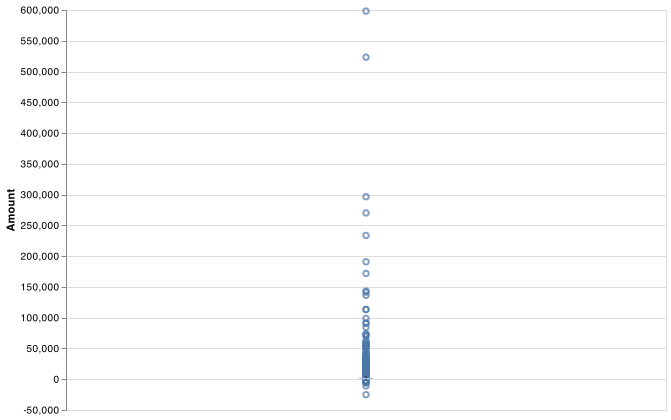

In [34]:
rfm_data |>
@vlplot(
    mark={:boxplot},
    y={:Amount, axis={title="Amount"}},
    height=400, 
    width=600
)

In [35]:
iqr(rfm_data[!, :Recency]), quantile(rfm_data[!, :Recency], [0.05, 0.95])

(356.0, [3.0, 627.0])

In [36]:
?iqr

search: iqr isqrt PartialQuickSort firstdayofquarter



```
iqr(x)
```

Compute the interquartile range (IQR) of collection `x`, i.e. the 75th percentile minus the 25th percentile.


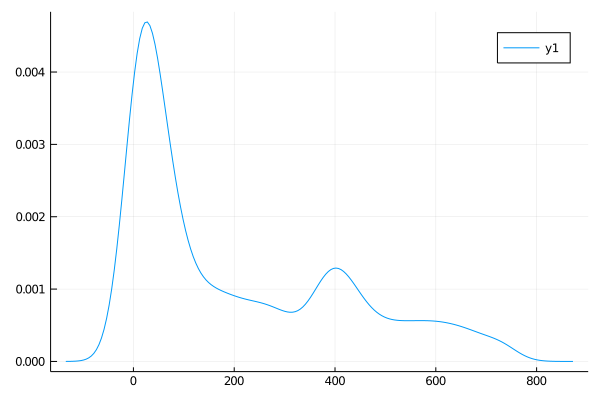

In [37]:
@df rfm_data density(:Recency)

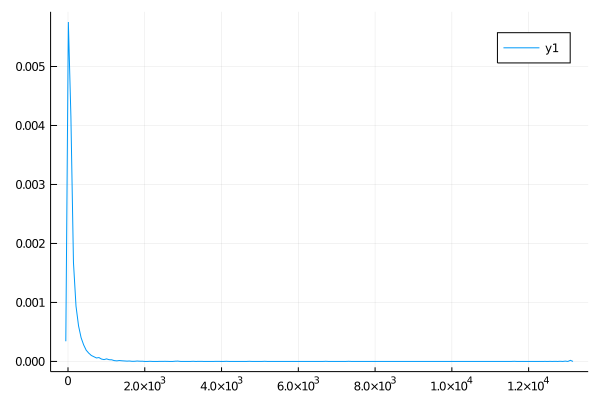

In [38]:
@df rfm_data density(:Frequency)

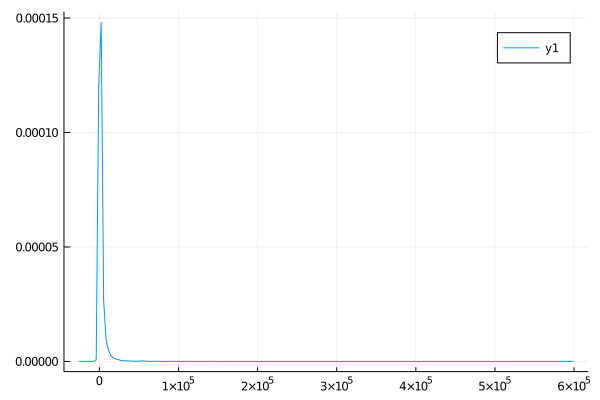

In [39]:
@df rfm_data density(:Amount)

In [40]:
rfm_data |> @filter(_.Recency == 0) |> DataFrame

,CustomerID,Recency,Frequency,Amount
,Int64,Int64,Int64,Float32
1,12423,0,166,2612.19
2,12433,0,707,20428.9
3,12476,0,564,13715.6
4,12518,0,124,2056.89
5,12526,0,71,1316.66
6,12662,0,411,6949.17
7,12680,0,53,880.81
8,12713,0,38,848.55
9,12748,0,7307,49969.3


In [41]:
function remove_outliers(df, bounds_limit::Float64 = 0.25)
    
    # copy of the dataset to avoid overwriting incoming data
    lb, up = bounds_limit, (1 - bounds_limit)
    copy_df = deepcopy(df)
    
    # filter quantiles using the IQR rule as dictated by the `bounds_limit`
    rec_q1, rec_q3 = quantile(copy_df[!, :Recency], [lb, up])
    rec_iqr = rec_q3 - rec_q1

    copy_df = copy_df |> 
        @filter(_.Recency >= (rec_q1 - 1.5rec_iqr) && _.Recency <= (rec_q3 + 1.5rec_iqr) ) |>
        DataFrame
        
    frec_q1, frec_q3 = quantile(copy_df[!, :Frequency], [lb, up])
    frec_iqr = frec_q3 - frec_q1
    
    copy_df = copy_df |> 
        @filter(_.Frequency >= (frec_q1 - 1.5frec_iqr) && _.Frequency <= (frec_q3 + 1.5frec_iqr) ) |>
        DataFrame
    
    amt_q1, amt_q3 = quantile(copy_df[!, :Amount], [lb, up])
    amt_iqr = amt_q3 - amt_q1
    
    copy_df = copy_df |>
        @filter(_.Amount >= (amt_q1 - 1.5amt_iqr) && _.Amount <= (amt_q3 + 1.5amt_iqr) ) |>
        DataFrame
    
    return copy_df
end

remove_outliers (generic function with 2 methods)

In [42]:
rfm_data |> describe

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Abstract…,Real,Float64,Real,Nothing,Nothing,DataType
1,CustomerID,15316.5,12346,15316.5,18287,,,Int64
2,Recency,201.909,0,95.0,738,,,Int64
3,Frequency,138.735,1,53.0,13097,,,Int64
4,Amount,2801.8,-25111.1,843.97,598215.0,,,Float32


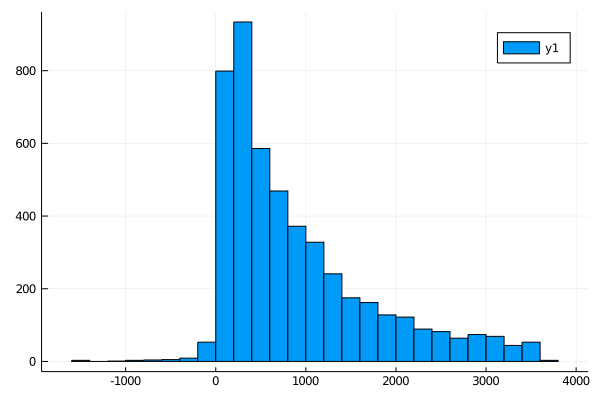

In [43]:
histogram(remove_outliers(rfm_data)[!, :Amount])

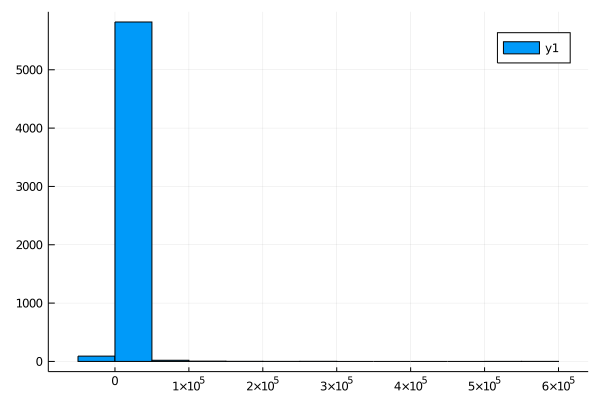

In [44]:
histogram(rfm_data[!, :Amount], bins=20)

In [45]:
clean_rfm_data = remove_outliers(rfm_data)

,CustomerID,Recency,Frequency,Amount
,Int64,Int64,Int64,Float32
1,12346,325,48,-64.6797
2,12348,74,51,2019.4
3,12350,309,17,334.4
4,12351,374,21,300.93
5,12352,35,113,1889.21
6,12353,203,24,406.76
7,12354,231,58,1079.4
8,12355,213,35,947.61
9,12361,286,29,511.25


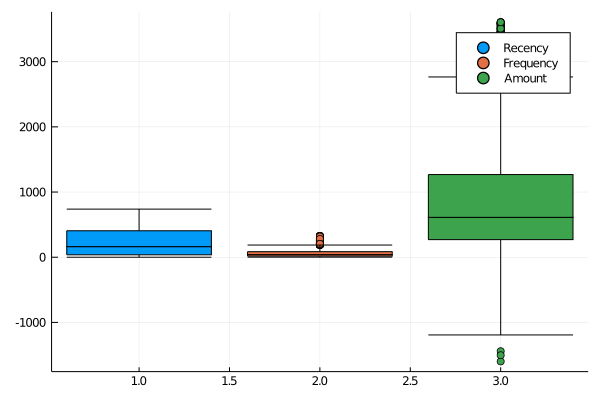

In [72]:
@df clean_rfm_data boxplot(:Recency, label="Recency")
@df clean_rfm_data boxplot!(:Frequency, label="Frequency")
@df clean_rfm_data boxplot!(:Amount, label="Amount")

In [46]:
long_rfm_data = stack(rfm_data, [:Recency, :Frequency, :Amount], :CustomerID)

,variable,value,CustomerID
,Symbol,Float32,Int64
1,Recency,325.0,12346
2,Recency,1.0,12347
3,Recency,74.0,12348
4,Recency,18.0,12349
5,Recency,309.0,12350
6,Recency,374.0,12351
7,Recency,35.0,12352
8,Recency,203.0,12353
9,Recency,231.0,12354


In [47]:
long_rfm_data |> unstack

,CustomerID,Amount,Frequency,Recency
,Int64,Float32⍰,Float32⍰,Float32⍰
1,12346,-64.6797,48.0,325.0
2,12347,5633.32,253.0,1.0
3,12348,2019.4,51.0,74.0
4,12349,4404.54,180.0,18.0
5,12350,334.4,17.0,309.0
6,12351,300.93,21.0,374.0
7,12352,1889.21,113.0,35.0
8,12353,406.76,24.0,203.0
9,12354,1079.4,58.0,231.0


In [48]:
long_rfm_data = long_rfm_data |>
    @select(:variable, :value) |>
    DataFrame 

,variable,value
,Symbol,Float32
1,Recency,325.0
2,Recency,1.0
3,Recency,74.0
4,Recency,18.0
5,Recency,309.0
6,Recency,374.0
7,Recency,35.0
8,Recency,203.0
9,Recency,231.0


In [49]:
long_rfm_data |> Voyager()

Voyager(Electron.Window(Application(Base.PipeEndpoint(RawFD(0x00000035) paused, 0 bytes waiting), Process(`/Users/mysterio/.julia/artifacts/8dcb05674719648a37669520bc9a6ef8773032f2/Julia.app/Contents/MacOS/Julia /Users/mysterio/.julia/packages/Electron/MNI24/src/main.js /var/folders/6s/5ypcf3452l34pcpmr53n07xh0000gn/T/jlel-452f8078982c11ea28861199dffdec0f /var/folders/6s/5ypcf3452l34pcpmr53n07xh0000gn/T/jlel-sn-452fcb96982c11ea3d5f37bbeec524b5 +1YPHKNoajmOPo5+JSb856o8z4vM+Iw649FIThyqEogiBZa+1NqgsAGOEEDB9bNY8an0SpGG9dNe1vwZruwTfvO3un8My/N/YYJOyzKjMc3RQRr+rPvmguPstBfrK8UQPTs1jgHpWEc072QyOS67B+Y5XRyMvnT2KB01MJBFnTM=`, ProcessRunning), [2 windows]), 2, true, Channel{Any}(sz_max:128,sz_curr:0)))

# Clustering Model

In [50]:
X = clean_rfm_data |>
    @select(:Recency, :Frequency, :Amount) |>
    DataFrame

,Recency,Frequency,Amount
,Int64,Int64,Float32
1,325,48,-64.6797
2,74,51,2019.4
3,309,17,334.4
4,374,21,300.93
5,35,113,1889.21
6,203,24,406.76
7,231,58,1079.4
8,213,35,947.61
9,286,29,511.25


In [51]:
schema(X)

┌───────────┬─────────┬────────────┐
│ _.names   │ _.types │ _.scitypes │
├───────────┼─────────┼────────────┤
│ Recency   │ Int64   │ Count      │
│ Frequency │ Int64   │ Count      │
│ Amount    │ Float32 │ Continuous │
└───────────┴─────────┴────────────┘
_.nrows = 4872


In [52]:
models(matching(X))

5-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = FeatureSelector, package_name = MLJModels, ... )
 (name = FillImputer, package_name = MLJModels, ... )
 (name = OneHotEncoder, package_name = MLJModels, ... )
 (name = Standardizer, package_name = MLJModels, ... )
 (name = StaticTransformer, package_name = MLJBase, ... )

In [53]:
coerce(X, :Recency => Continuous, :Frequency => Continuous) |> schema

┌───────────┬─────────┬────────────┐
│ _.names   │ _.types │ _.scitypes │
├───────────┼─────────┼────────────┤
│ Recency   │ Float64 │ Continuous │
│ Frequency │ Float64 │ Continuous │
│ Amount    │ Float32 │ Continuous │
└───────────┴─────────┴────────────┘
_.nrows = 4872


In [54]:
models(matching(coerce(X, :Recency => Continuous,
                :Frequency => Continuous))
    )

22-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AffinityPropagation, package_name = ScikitLearn, ... )
 (name = AgglomerativeClustering, package_name = ScikitLearn, ... )
 (name = Birch, package_name = ScikitLearn, ... )
 (name = DBSCAN, package_name = ScikitLearn, ... )
 (name = FeatureAgglomeration, package_name = ScikitLearn, ... )
 (name = FeatureSelector, package_name = MLJModels, ... )
 (name = FillImputer, package_name = MLJModels, ... )
 (name = ICA, package_name = MultivariateStats, ... )
 (name = KMeans, package_name = Clustering, ... )
 (name = KMeans, package_name = ParallelKMeans, ... )
 (name = KMeans, package_name = ScikitLearn, ... )


## Clustering Pipeline

In [55]:
@load KMeans pkg=ParallelKMeans

KMeans(
    algo = ParallelKMeans.Hamerly(),
    k_init = "k-means++",
    k = 3,
    tol = 1.0e-6,
    max_iters = 300,
    copy = true,
    threads = 4,
    rng = Random._GLOBAL_RNG(),
    weights = nothing,
    init = nothing) @ 3…90

pipe = @pipeline ClsPipe(x -> coerce(x, :Recency => Continuous,
                                    :Frequency => Continuous),
                        std = Standardizer(),
                        model = KMeans(rng=2020))

In [57]:
pipe

ClsPipe(
    std = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    model = KMeans(
            algo = ParallelKMeans.Hamerly(),
            k_init = "k-means++",
            k = 3,
            tol = 1.0e-6,
            max_iters = 300,
            copy = true,
            threads = 4,
            rng = 2020,
            weights = nothing,
            init = nothing)) @ 1…26

In [58]:
# Train pipeline
mach = machine(pipe, X) |> fit!

┌ Info: Training Machine{ClsPipe} @ 1…21.
└ @ MLJBase /Users/mysterio/.julia/packages/MLJBase/O5b6j/src/machines.jl:187
┌ Info: Training NodalMachine{Standardizer} @ 1…17.
└ @ MLJBase /Users/mysterio/.julia/packages/MLJBase/O5b6j/src/machines.jl:187
┌ Info: Training NodalMachine{KMeans} @ 2…19.
└ @ MLJBase /Users/mysterio/.julia/packages/MLJBase/O5b6j/src/machines.jl:187


Iteration 1: Jclust = 24926.058399009107
Iteration 2: Jclust = 7766.656402046671
Iteration 3: Jclust = 7736.083524214484
Iteration 4: Jclust = 7302.304255808282
Iteration 5: Jclust = 7238.406687215709
Iteration 6: Jclust = 5988.222884095754
Iteration 7: Jclust = 6077.368597977084
Iteration 8: Jclust = 6072.473041830366
Iteration 9: Jclust = 6113.027552506897
Iteration 10: Jclust = 6147.7802777316865
Iteration 11: Jclust = 6166.872256885685
Iteration 12: Jclust = 6174.868475470394
Iteration 13: Jclust = 6200.642411399573
Iteration 14: Jclust = 6220.440656268985
Iteration 15: Jclust = 6226.884140282909
Iteration 16: Jclust = 6232.960349651802
Iteration 17: Jclust = 6236.044374774162
Iteration 18: Jclust = 6236.044374774162
Successfully terminated with convergence.


Machine{ClsPipe} @ 1…21


In [59]:
F = fitted_params(mach)

(machines = Any[NodalMachine{KMeans} @ 2…19, NodalMachine{Standardizer} @ 1…17],
 fitted_params_given_machine = OrderedCollections.LittleDict{Any,Any,Array{Any,1},Array{Any,1}}(NodalMachine{KMeans} @ 2…19 => (cluster_centers = [1.1626878272782069 -0.6004962825103887 -0.6500333218530656; -0.5271555317719288 1.4527635849207223 -0.30626184247438987; -0.583808856425416 1.464346740091524 -0.26558937098560154],),NodalMachine{Standardizer} @ 1…17 => (mean_and_std_given_feature = Dict(:Recency => (233.16646141215108, 216.1058919097918),:Amount => (895.4340209960938, 839.3438110351562),:Frequency => (61.82717569786535, 62.844240625095786)),)),)

In [60]:
F.fitted_params_given_machine[F.machines[1]]

(cluster_centers = [1.1626878272782069 -0.6004962825103887 -0.6500333218530656; -0.5271555317719288 1.4527635849207223 -0.30626184247438987; -0.583808856425416 1.464346740091524 -0.26558937098560154],)

In [61]:
F.fitted_params_given_machine[F.machines[2]]

(mean_and_std_given_feature = Dict(:Recency => (233.16646141215108, 216.1058919097918),:Amount => (895.4340209960938, 839.3438110351562),:Frequency => (61.82717569786535, 62.844240625095786)),)

In [62]:
report(F.machines[1])

(cluster_centers = [1.1626878272782069 -0.6004962825103887 -0.6500333218530656; -0.5271555317719288 1.4527635849207223 -0.30626184247438987; -0.583808856425416 1.464346740091524 -0.26558937098560154],
 iterations = 18,
 totalcost = 5090.1725593494375,
 assignments = [1, 3, 1, 1, 2, 3, 3, 3, 1, 3  …  2, 3, 3, 1, 3, 3, 3, 1, 1, 1],
 labels = CategoricalValue{Int64,UInt32}[1, 2, 3],)

In [63]:
report(F.machines[2])

(features_fit = [:Recency, :Amount, :Frequency],)

In [64]:
clean_rfm_data[!, :ClusterGroup] = report(F.machines[1]).assignments;

In [65]:
clean_rfm_data

,CustomerID,Recency,Frequency,Amount,ClusterGroup
,Int64,Int64,Int64,Float32,Int64
1,12346,325,48,-64.6797,1
2,12348,74,51,2019.4,3
3,12350,309,17,334.4,1
4,12351,374,21,300.93,1
5,12352,35,113,1889.21,2
6,12353,203,24,406.76,3
7,12354,231,58,1079.4,3
8,12355,213,35,947.61,3
9,12361,286,29,511.25,1


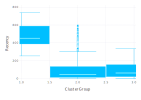

In [69]:
p4 = Gadfly.plot(clean_rfm_data[!, [:ClusterGroup, :Recency]],
    x= :ClusterGroup,  y = :Recency, Geom.boxplot)

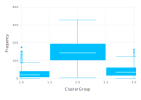

In [70]:
p5 = Gadfly.plot(clean_rfm_data[!, [:ClusterGroup, :Frequency]],
    x = :ClusterGroup, y = :Frequency, Geom.boxplot)

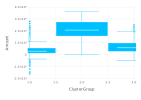

In [71]:
p6 = Gadfly.plot(clean_rfm_data[!, [:ClusterGroup, :Amount]],
    x = :ClusterGroup, y =:Amount, Geom.boxplot)